## Project - AllLife Bank Unsupervised Learning
### author: Aidos Utegulov Feb 21 cohort

### Description
**Context:**
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help<br />
**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

**Dataset:**  ALLLife bank<br />
**Data Description:** Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

### Import libraries

In [67]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### Read the data

In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Dataset summary

In [4]:
df.shape

(660, 7)

In [5]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


### Observations and Insights

- The dataset contains 660 rows and 7 columns. 2 of the columns Sl_No can be safely dropped, since it carries no significant information
- All of the columns are of numeric type.
- If we look at mean, max and std features of the dataset, it's clear that some (e.g. average credit limit) of the columns contain outliers

### Dropping and renaming columns

In [8]:
df.drop(['Sl_No'], axis = 1, inplace = True)

In [10]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [11]:
df = df.rename(columns = {'Customer Key':'Customer_Key'})

In [14]:
df.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


# EDA

### Univariate Analysis

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Count'>

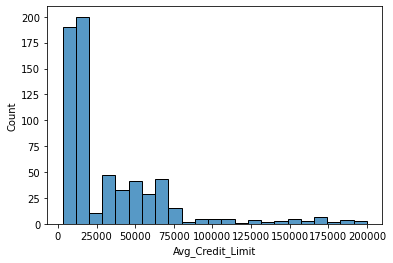

In [20]:
# the values in average credit limit should be displayed separately
sns.histplot(df['Avg_Credit_Limit'])

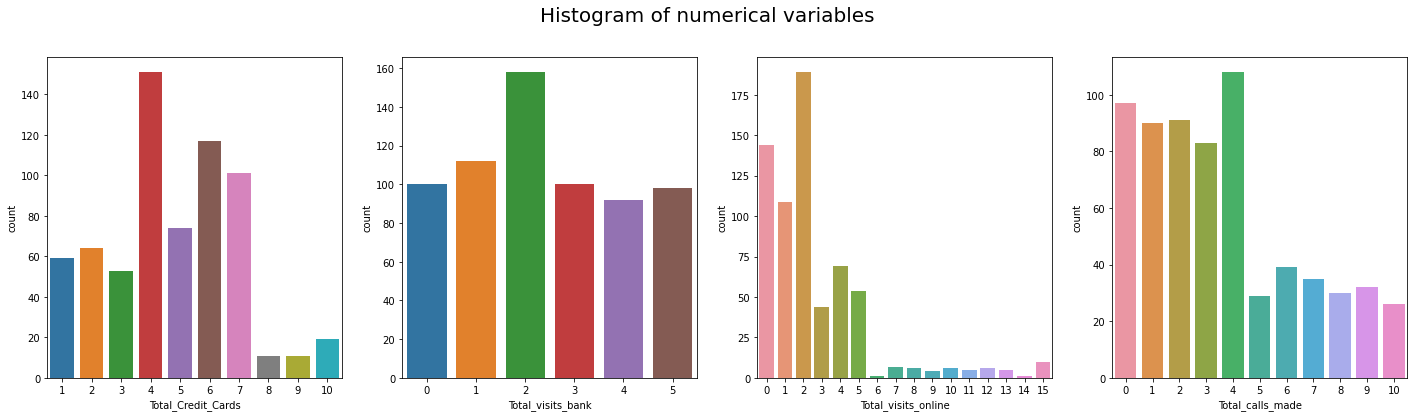

In [18]:
all_col = df.iloc[:,2:].columns.tolist()
fig, axes = plt.subplots(1, 4,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(4):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**
- A significant portion of customers have never visited a bank (whether it's an online or offline visit
- Some customers own no credit cards, while a significant portion of customers own 4 credit cards
- Data in the average credit limit column are right-skewed, with most of the data being in the range 3000 - 25000
- number of online visits is also right-skewed, with most of the data being in the range 0-5 visits

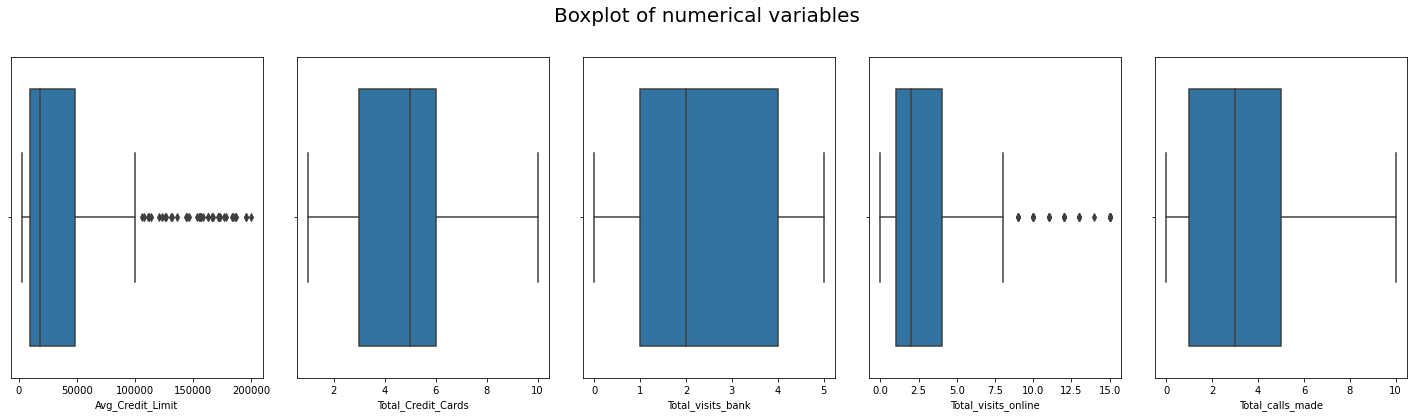

In [22]:
all_col = df.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**
- As expected, the average credit limit column has a significant number of outliers
- Most of the customers seem to have an average credit limit below 50k
- Some of the outliers can be observed in the total visits online column
- 75% of customers have 2 or more total visits to the bank
- Majority of customers have between 3 and 5 total credit cards
- majority of data in the total number calls made column seem distributed equally between 1-3 and 3-5 calls

* I choose not to perform outlier treatment, since I don't want to obscure the data when presenting to the customer

### Bivariate Analsysis

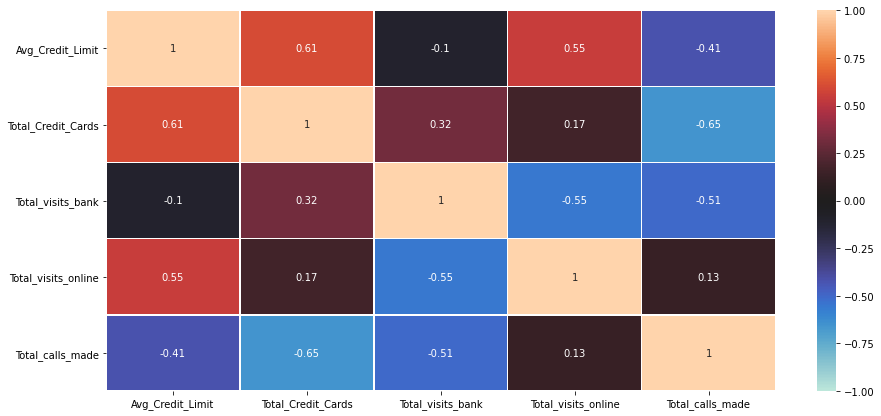

In [23]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

**Observations**
- average credit limit is strongly positively correlated with: total credit cards (0.61), which makes sense - the more credit cards a customer owns - the more the credit limit; total visits online (0.55) - probably the customer checks the state of his/her account more often; somewhat negatively correlated with total calls made (-0.41)
- total_visits_bank is somewhat negatively correlated to total_visits_online (-0.55) (which makes sense, why visit the bank when you can check everything online?), and total_calls_made (-0.51) (again, same question)
- total_credit_cards is a bit strongly negatively correlated to total_calls_made (-0.65).
- there might be a possibility to reduce the number of features to analyze through PCA

### Pairplots of columns

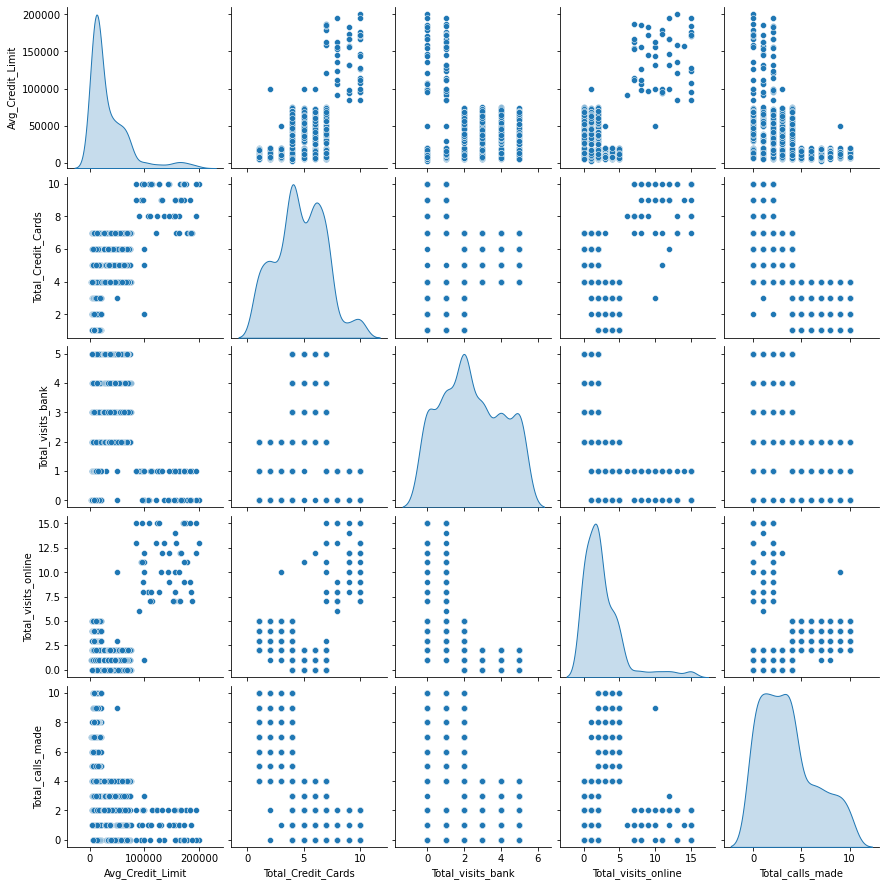

In [24]:
sns.pairplot(df[all_col],diag_kind="kde")

**Observations**
- There is some collinearity between different columns but it is not very clearly seen in the pairplots
- the diagonal figures give us some idea on the number of clusters required: for example, total_visits_bank column has 4 peaks, which means that there are at least 4 groups of data, the distribution of total_credit_cards column also has 4 peaks, the average credit limit has 3 peaks and total_calls_made has also 3 peaks


### Check dataframe for duplicates

In [29]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Customer_Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []


## K-means clustering

In [26]:
# Scaling the data set before clustering
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)   

In [27]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908774911268212
Number of Clusters: 6 	Average Distortion: 0.9430881668510841
Number of Clusters: 7 	Average Distortion: 0.9228031634664603
Number of Clusters: 8 	Average Distortion: 0.8903475742390693


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

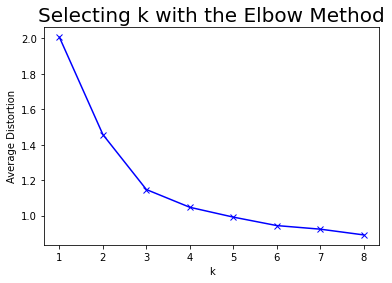

In [33]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

* We can see from the plot that the appropriate number of clusters is 3 or 4
* Let us now check the silhouette score

In [34]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41842496663215445)
For n_clusters = 3, silhouette score is 0.5157182558881063)
For n_clusters = 4, silhouette score is 0.3556670619372605)
For n_clusters = 5, silhouette score is 0.2717470361089752)
For n_clusters = 6, silhouette score is 0.255499043345148)
For n_clusters = 7, silhouette score is 0.23447675686149505)
For n_clusters = 8, silhouette score is 0.227354637373507)
For n_clusters = 9, silhouette score is 0.21534446144838185)


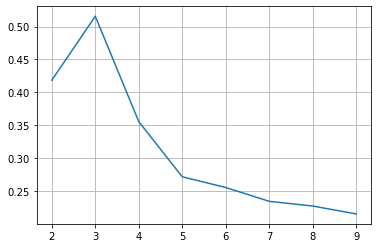

In [35]:
plt.plot(cluster_list,sil_score)
plt.grid()

**Observation**
- The silhouette score is at its maximum when the number of clusters is equal to 3, that is why I will be picking k = 3 for the K-means clustering algorithm

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [43]:
df['K_means_segments'] = kmeans.labels_

In [44]:
cluster_profile = df.groupby('K_means_segments').mean()

In [48]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments').count().values

In [49]:
cluster_profile

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<AxesSubplot:xlabel='K_means_segments'>

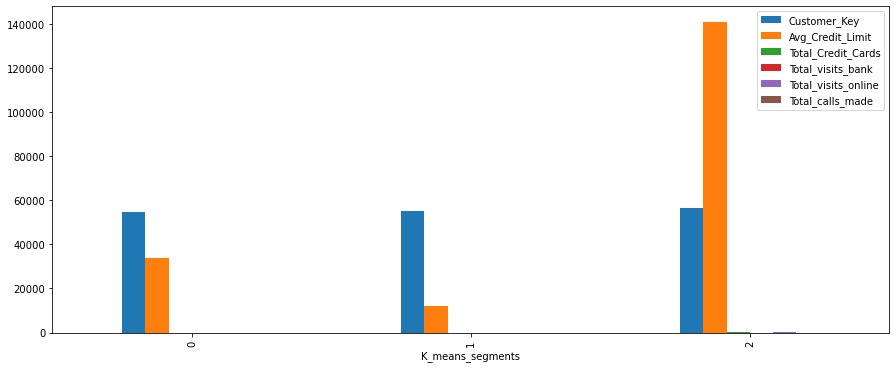

In [50]:
df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

**Observations**
- We can see immediately that there are 3 clusters, and the main column here that has most impact is average credit limit. We can even see the mean value of the average credit limit in each cluster (cluster 0 with the mean of Avg_credit_limit equal to 33782, cluster 1 with the mean of Avg_credit_limit equal to 12174, and cluster 2 with the mean of Avg_credit_limit equal to 141040 (super rich guys))
- The average credit limit column has huge values that overshadow the values of all other columns, perhaps a clearer picture can be seen if we use the scaled dataset

In [51]:
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [57]:
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [52]:
cluster_profile_scaled = subset_scaled_df.groupby('K_means_segments').mean()

In [61]:
cluster_profile_scaled['count_in_each_segment'] = subset_scaled_df.groupby('K_means_segments')

In [62]:
cluster_profile_scaled['count_in_each_segment'] = subset_scaled_df.groupby('K_means_segments')['Total_visits_bank'].count().values

In [63]:
cluster_profile_scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,-0.021062,0.373690,0.666395,-0.553672,-0.553005,386
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109,224
2,2.831764,1.862226,-1.105763,2.827319,-0.874330,50


<AxesSubplot:xlabel='K_means_segments'>

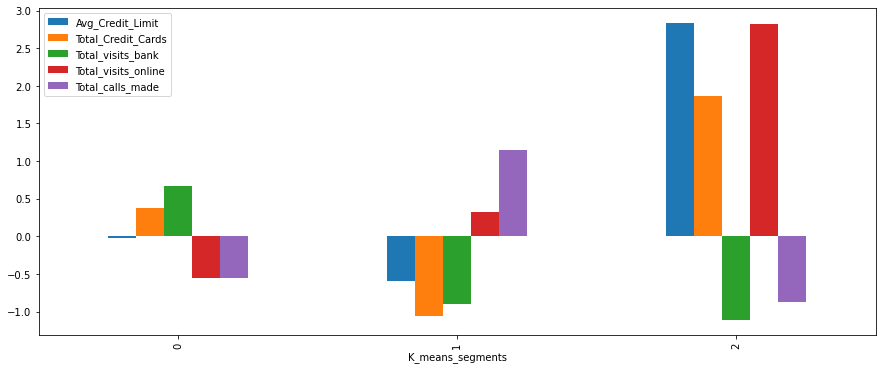

In [65]:
subset_scaled_df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

**Observations**
- This is not an ideal picture, but at least we can see the mean values of columns grouped by each cluster. Although the values do contain negatives, this is due to z-score.

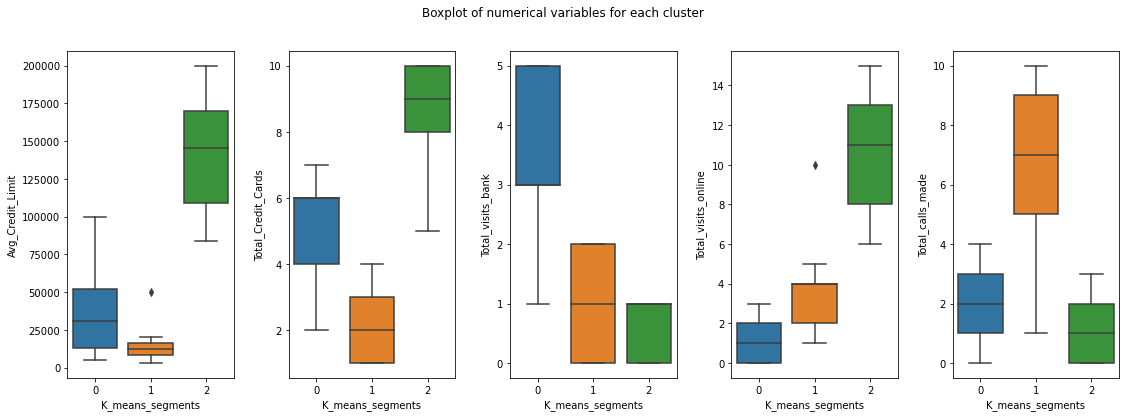

In [66]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Insights**
- Cluster 0:
    - average credit limit is in the range ~5k to 100k with the majority of values in the range ~13k - 50k
    - total credit cards is 2 to 7 with the majority of customers in the cluster having 4-6 cards
    - total visits to the bank range from 1 to 5 with the majority of values in the range 3-5
    - total visits online range from 0 to 3 with the majority of values in the range 0-2
    - total calls made range from 0 to 4 with the majority of values in the range 0 - 2 
    
- Cluster 1:
    - average credit limit is in the range ~5k to ~20k with the majority of values in the range ~10k-15k
    - total credit cards is 1 to 4 with the majority of values in the range 1-3
    - total visits to the bank range from 0 to 2
    - total visits online range from 1 to 5 with the majority of values in the range 2-4
    - total calls made range from 1 to 10 with the majority of values in the range 5-9 
    
- Cluster 2:
    - average credit limit is in the range ~80k to ~200k with the majority of values in the range ~105k-170k
    - total credit cards is 5 to 10 with the majority of values in the range 8-10
    - total visits to the bank range from 0 to 1 
    - total visits online range from 6 to 15 with the majority of values in the range 8-13
    - total calls made range from 0 to 3 with the majority of values in the range 0-2 

## Hierarchical Clustering

In [70]:
subset_hier = subset_scaled_df.drop(['K_means_segments'], axis = 1)

In [73]:
subset_hier.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Find out the linkage matrix

In [74]:
#Use ward as linkage metric and distance as Eucledian
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(subset_hier, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [75]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

### Plot the dendrogram for the consolidated dataframe

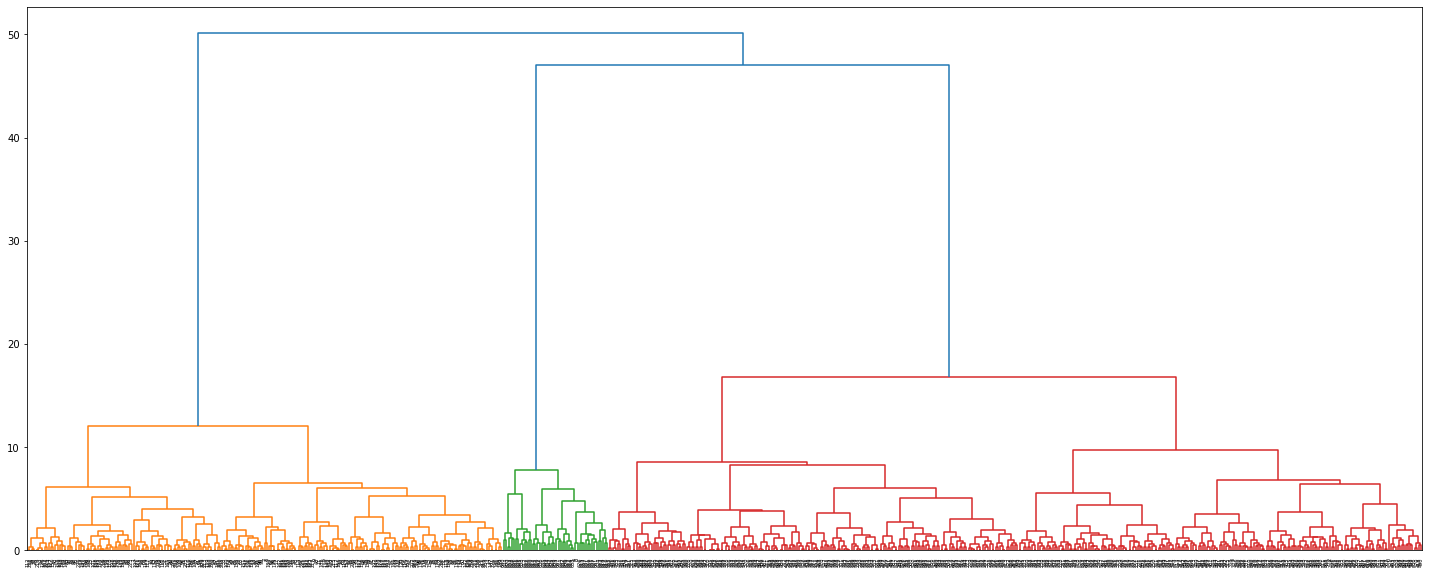

In [76]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

### From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

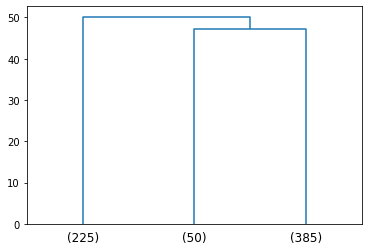

In [77]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [78]:
max_d = 46

### Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [79]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [81]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(subset_hier,clusters)

0.5147639589977819

* This is the same silhouette score we saw during K-means clustering, and we can't really do any better in my opinion

### Final dendogram with 'ward linkage'

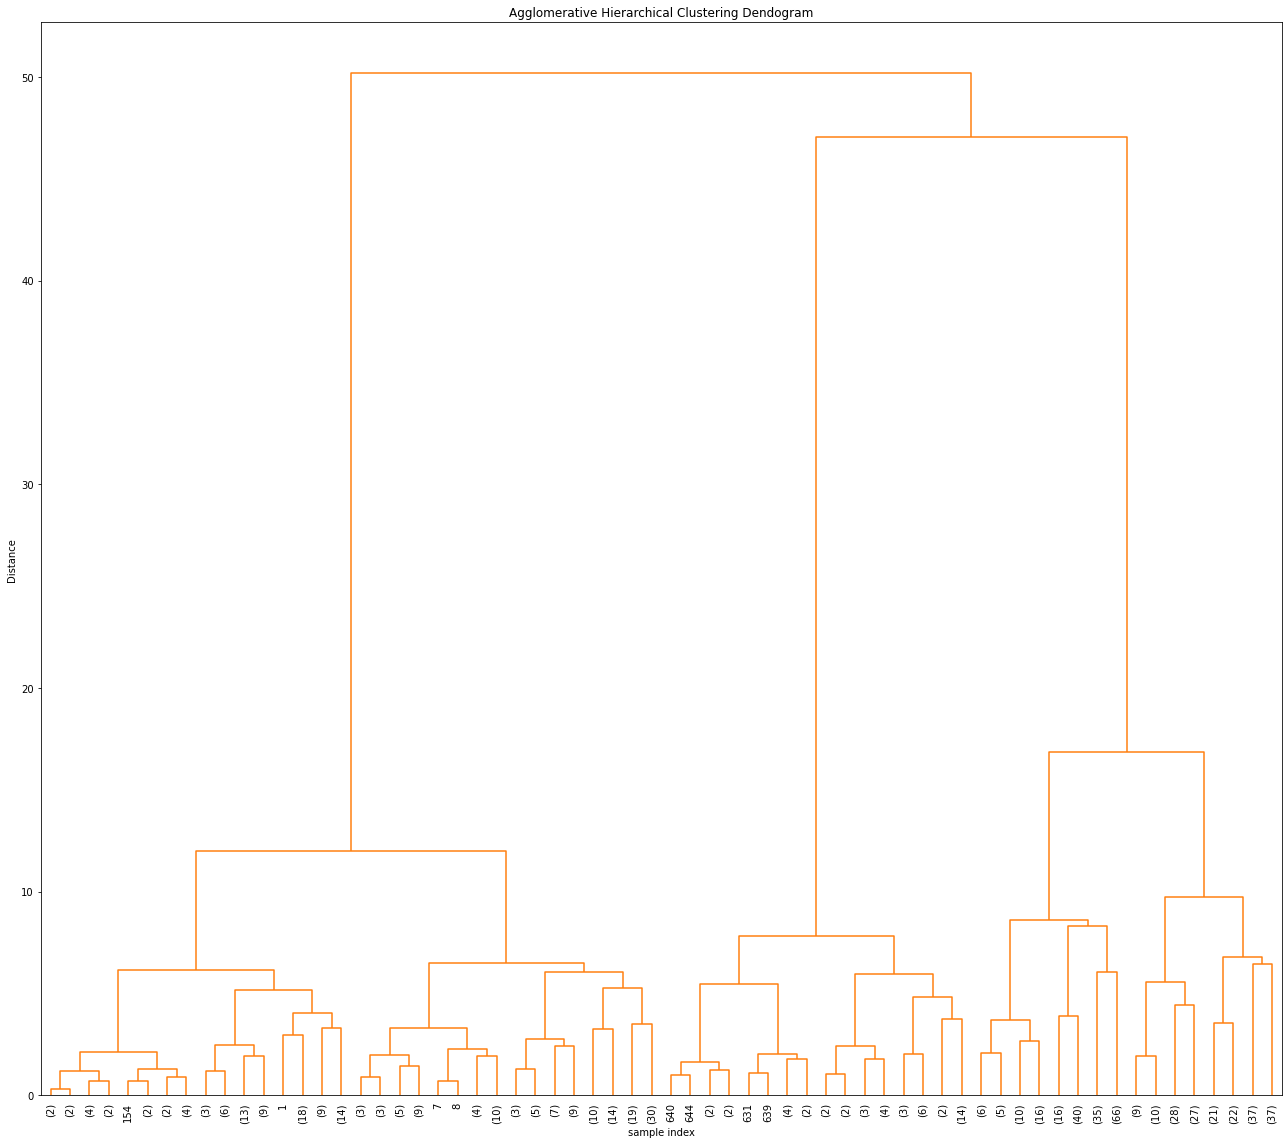

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subset_hier, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### Agglomerative clustering with average linkage

In [83]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [84]:
model.fit(subset_hier)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [87]:
df['hierarchical_segments'] = model.labels_

In [88]:
df.head()

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,hierarchical_segments
0,87073,100000,2,1,1,0,0,0
1,38414,50000,3,0,10,9,1,2
2,17341,50000,7,1,3,4,0,0
3,40496,30000,5,1,1,4,0,0
4,47437,100000,6,0,12,3,2,1


In [89]:
cluster_profile_hier = df.groupby('hierarchical_segments').mean()

In [91]:
cluster_profile_hier['count_in_each_segment'] = df.groupby('hierarchical_segments')['Avg_Credit_Limit'].count().values

In [93]:
cluster_profile_hier.drop(['K_means_segments'], axis = 1, inplace=True)

In [94]:
cluster_profile_hier

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
hierarchical_segments,,,,,,,
0,54925.966408,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,55163.973094,12197.309417,2.403587,0.928251,3.560538,6.883408,223


**Compare this to K-means clustering profile**

In [96]:
cluster_profile

,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


**Insights**
- While the labeling differs (clusters 1 and 2 are interchanged in the hierarchical cluster profile), the values in the clusters are almost the same, with 1 exception: 1 observation made it to a different cluster, namely from cluster 0 to cluster 1, i.e from the cluster with the mean of average credit line equal to 33782 to the cluster where the mean of average credit limit is 12174

# Insights and Business Recommendations

- **Cluster 0**: These are the customers that have an average credit limit in the range ~5k - 100k, they hold 2-7 credit cards and visit the bank on a regular basis, they rarely use bank's online services and also rarely call the bank. The bank could maybe delegate the task of dealing with this type of customers to the branch managers.

- **Cluster 1 (2 in hierarchical clustering)**: These are the customers that have an average credit limit in the range ~5k - 20k, they hold 1-4 credit cards and visit the bank rarely. They prefer visiting the bank online or regularly calling the bank. So the preferred method of communication is over the phone and the bank could use this information to call the customers and inform them of any new credit card campaigns initiated by the bank.

- **Cluster 2 (1 in hierarchical clustering)**: These are the customers that have an average credit limit in the range ~80k - 200k, they hold 5-10 credit cards and almost never visit the bank. They extensively use bank's online services and don't really call the bank. They're probably very rich and tech-savvy. Therefore, the bank should target them for their online campaigns.